<center><h1> Data preperation and Model creation for Predicting Delivery Date</h1></center>

In [15]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')
#for z score
from scipy import stats

# for data visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#  for evaluating the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

missing_values = ['N/a','na',' ','',np.nan] 

df=pd.read_csv(r'C:\Users\PrashantThakre\OneDrive - Eurofins\backup\AI-ML\ExpectedDeliveyDate_withMachineName_2022_09_08.csv')
#maindf=pd.read_csv(r'C:\Users\PrashantThakre\OneDrive - Eurofins\backup\AI-ML\ExpectedDeliveryDateQuery_2022_08_30.csv')
df

,OrderId,OrderCreationDateTime,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,shipmentdate,MachineName
0,11107968357-1,2022-06-01 14:24:45.960000,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,0.01 µmol,ALCU,FAST,2022-06-02 19:29:58.703000,CFS EBE 3
1,11107968477-1,2022-06-01 14:58:12.207000,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,0.01 µmol,ALCU,FAST,2022-06-02 23:45:46.987000,CFS EBE 3
2,11107970522-1,2022-06-02 14:37:10.350000,2022-06-02 14:21:54,2022-06-04 19:00:00,32978058,20,0.01 µmol,ALCU,HPSF,2022-06-03 03:28:23.253000,CFS EBE 3
3,11107971036-1,2022-06-02 18:16:02.437000,2022-06-02 18:00:45,2022-06-04 19:00:00,32979249,20,0.01 µmol,ALCU,FAST,2022-06-03 07:57:26.947000,CFS EBE 3
4,11107972248-1,2022-06-03 12:23:35.393000,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,0.01 µmol,SFONXP,FAST,2022-06-08 17:34:09.287000,CFS CGN 1
...,...,...,...,...,...,...,...,...,...,...,...
446969,11108010158-KN_UDIorder_A02_2-1,2022-07-01 12:09:17.050000,2022-07-01 11:53:01.190000,2022-09-05 19:00:00,33089141,70,0.05 µmol,NGSUDI,FAST,NaN,NaN
446970,11108010158-KN_UDIorder_A02_2-1,2022-07-01 12:09:17.050000,2022-07-01 11:53:01.190000,2022-09-05 19:00:00,33089102,70,0.05 µmol,NGSUDI,FAST,NaN,NaN
446971,11108010158-KN_UDIorder_A02_2-1,2022-07-01 12:09:17.050000,2022-07-01 11:53:01.190000,2022-09-05 19:00:00,33089123,70,0.05 µmol,NGSUDI,FAST,NaN,NaN
446972,11108010158-KN_UDIorder_A02_2-1,2022-07-01 12:09:17.050000,2022-07-01 11:53:01.190000,2022-09-05 19:00:00,33088976,74,0.05 µmol,NGSUDI,FAST,NaN,NaN


In [16]:
#Drop ï»¿OrderId
df=df.drop(df.iloc[:,0:1],axis=1)

In [4]:
#Drop columns which are not requried for EDA
#df=df.drop(['OrderFirstConfirmedDateTime','OrderDueDate','ido'],axis=1)

In [5]:
df

,sequencelength,ProdScale,PITname,PurificationName,shipmentdate,MachineName
0,17,0.01 µmol,ALCU,FAST,2022-06-02 19:29:58.703000,CFS EBE 3
1,21,0.01 µmol,ALCU,FAST,2022-06-02 23:45:46.987000,CFS EBE 3
2,20,0.01 µmol,ALCU,HPSF,2022-06-03 03:28:23.253000,CFS EBE 3
3,20,0.01 µmol,ALCU,FAST,2022-06-03 07:57:26.947000,CFS EBE 3
4,30,0.01 µmol,SFONXP,FAST,2022-06-08 17:34:09.287000,CFS CGN 1
...,...,...,...,...,...,...
446969,70,0.05 µmol,NGSUDI,FAST,NaN,NaN
446970,70,0.05 µmol,NGSUDI,FAST,NaN,NaN
446971,70,0.05 µmol,NGSUDI,FAST,NaN,NaN
446972,74,0.05 µmol,NGSUDI,FAST,NaN,NaN


In [17]:
#df=df.dropna()
#df

df=df.dropna(subset = ['shipmentdate', 'OrderCreationDateTime', 'MachineName'])

In [18]:
df

,OrderCreationDateTime,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,shipmentdate,MachineName
0,2022-06-01 14:24:45.960000,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,0.01 µmol,ALCU,FAST,2022-06-02 19:29:58.703000,CFS EBE 3
1,2022-06-01 14:58:12.207000,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,0.01 µmol,ALCU,FAST,2022-06-02 23:45:46.987000,CFS EBE 3
2,2022-06-02 14:37:10.350000,2022-06-02 14:21:54,2022-06-04 19:00:00,32978058,20,0.01 µmol,ALCU,HPSF,2022-06-03 03:28:23.253000,CFS EBE 3
3,2022-06-02 18:16:02.437000,2022-06-02 18:00:45,2022-06-04 19:00:00,32979249,20,0.01 µmol,ALCU,FAST,2022-06-03 07:57:26.947000,CFS EBE 3
4,2022-06-03 12:23:35.393000,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,0.01 µmol,SFONXP,FAST,2022-06-08 17:34:09.287000,CFS CGN 1
...,...,...,...,...,...,...,...,...,...,...
446946,2022-06-22 09:01:35.250000,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049819,70,0.05 µmol,NGSUDI,FAST,2022-07-21 13:03:45,CFS EBE 2
446947,2022-06-22 09:01:35.250000,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049847,70,0.05 µmol,NGSUDI,FAST,2022-07-21 13:03:45,CFS EBE 2
446948,2022-06-22 09:01:35.250000,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049831,70,0.05 µmol,NGSUDI,FAST,2022-07-21 13:03:45,CFS EBE 2
446962,2022-06-22 09:01:35.250000,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049856,70,0.05 µmol,NGSUDI,FAST,2022-07-21 13:03:45,CFS EBE 2


In [19]:
#convert to string and do left and right trim to remove whitespaces
df.ProdScale=df.ProdScale.astype(str).str.strip()
#remove units from ProdScale
df['ProdScale'] = df['ProdScale'].str.replace(r' µmol', '')  


In [20]:
#df.drop_duplicates(keep='first',inplace=True)

In [21]:
#get the date diff
#convert OrderCreationDateTime and shipmentdate in datetime
df['OrderCreationDateTime']=pd.to_datetime(df['OrderCreationDateTime'])
df['shipmentdate']=pd.to_datetime(df['shipmentdate'])

#calculate total shipment time
df['time_delta'] = (df.shipmentdate - df.OrderCreationDateTime)

df

,OrderCreationDateTime,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,shipmentdate,MachineName,time_delta
0,2022-06-01 14:24:45.960,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,0.01,ALCU,FAST,2022-06-02 19:29:58.703,CFS EBE 3,1 days 05:05:12.743000
1,2022-06-01 14:58:12.207,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,0.01,ALCU,FAST,2022-06-02 23:45:46.987,CFS EBE 3,1 days 08:47:34.780000
2,2022-06-02 14:37:10.350,2022-06-02 14:21:54,2022-06-04 19:00:00,32978058,20,0.01,ALCU,HPSF,2022-06-03 03:28:23.253,CFS EBE 3,0 days 12:51:12.903000
3,2022-06-02 18:16:02.437,2022-06-02 18:00:45,2022-06-04 19:00:00,32979249,20,0.01,ALCU,FAST,2022-06-03 07:57:26.947,CFS EBE 3,0 days 13:41:24.510000
4,2022-06-03 12:23:35.393,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,0.01,SFONXP,FAST,2022-06-08 17:34:09.287,CFS CGN 1,5 days 05:10:33.894000
...,...,...,...,...,...,...,...,...,...,...,...
446946,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049819,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000
446947,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049847,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000
446948,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049831,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000
446962,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049856,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000


In [22]:
# create a colume with timedelta as total minutes, as a float type
import math
df['shipment_time_days'] = ((df.shipmentdate - df.OrderCreationDateTime) / pd.Timedelta(hours=2)).apply(np.ceil)
df['shipment_time_days'] = df['shipment_time_days'].astype('int')

In [23]:
df

,OrderCreationDateTime,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,shipmentdate,MachineName,time_delta,shipment_time_days
0,2022-06-01 14:24:45.960,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,0.01,ALCU,FAST,2022-06-02 19:29:58.703,CFS EBE 3,1 days 05:05:12.743000,15
1,2022-06-01 14:58:12.207,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,0.01,ALCU,FAST,2022-06-02 23:45:46.987,CFS EBE 3,1 days 08:47:34.780000,17
2,2022-06-02 14:37:10.350,2022-06-02 14:21:54,2022-06-04 19:00:00,32978058,20,0.01,ALCU,HPSF,2022-06-03 03:28:23.253,CFS EBE 3,0 days 12:51:12.903000,7
3,2022-06-02 18:16:02.437,2022-06-02 18:00:45,2022-06-04 19:00:00,32979249,20,0.01,ALCU,FAST,2022-06-03 07:57:26.947,CFS EBE 3,0 days 13:41:24.510000,7
4,2022-06-03 12:23:35.393,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,0.01,SFONXP,FAST,2022-06-08 17:34:09.287,CFS CGN 1,5 days 05:10:33.894000,63
...,...,...,...,...,...,...,...,...,...,...,...,...
446946,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049819,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000,351
446947,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049847,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000,351
446948,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049831,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000,351
446962,2022-06-22 09:01:35.250,2022-06-21 07:40:38.050000,2022-07-26 19:00:00,33049856,70,0.05,NGSUDI,FAST,2022-07-21 13:03:45.000,CFS EBE 2,29 days 04:02:09.750000,351


In [24]:
df=df.drop(['OrderCreationDateTime','time_delta','shipmentdate'],axis=1)

In [25]:
def pintLenColVal():
    a=df.columns
    for a in df.columns:
        print( f" {a} : ",len(pd.unique(df[a])))

pintLenColVal()

 OrderFirstConfirmedDateTime :  46841
 OrderDueDate :  350
 ido :  424736
 sequencelength :  119
 ProdScale :  7
 PITname :  22
 PurificationName :  4
 MachineName :  23
 shipment_time_days :  344


<AxesSubplot:xlabel='shipment_time_days'>

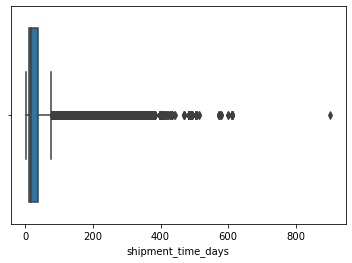

In [26]:
sns.boxplot('shipment_time_days',data=df)

In [27]:
df.sort_values(['shipment_time_days'], ascending=False)

,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,MachineName,shipment_time_days
206230,2022-05-12 13:06:11,2022-05-23 19:00:00,32891062,5,0.01,ALCM,HPLC,OligoMaker 5,902
433993,2022-06-01 14:14:00.317000,2022-06-18 19:00:00,32969157,22,0.05,PCRP,HPSF,HF 15,611
430567,2022-06-01 14:14:00.317000,2022-06-18 19:00:00,32969161,20,0.05,PCRP,HPSF,HF 15,611
75862,2022-06-01 14:14:00.317000,2022-06-18 19:00:00,32969153,20,0.05,PCRP,HPSF,HF 15,611
278336,2022-06-01 14:14:00.317000,2022-06-18 19:00:00,32969150,20,0.05,PCRP,HPSF,HF 15,611
...,...,...,...,...,...,...,...,...,...
101234,2022-08-11 16:04:56.167000,2022-08-12 23:59:59,33253860,20,0.01,SFONXP,FAST,CFS CGN 1,2
338873,2022-05-30 15:05:41,2022-05-31 23:59:59,32959936,20,0.01,SFONXP,FAST,CFS CGN 1,2
438779,2022-06-24 15:56:07,2022-06-26 23:59:59,33063959,19,0.01,SFONXP,FAST,CFS CGN 1,2
385636,2022-05-20 15:48:54.470000,2022-05-21 23:59:59,32927645,23,0.01,SEQPNXP,HPSF,CFS CGN 1,2


In [28]:
#drop the rows where shipment_time_hrs value is greater than 7 days (168 hours)
#df.drop(df[df['shipment_time_days'] > 7].index,inplace = True)

In [29]:
#drop the rows where shipment_time_hrs value is greater than 7 days (168 hours)
df.drop(df[df['shipment_time_days'] > 84].index,inplace = True)

<AxesSubplot:xlabel='shipment_time_days'>

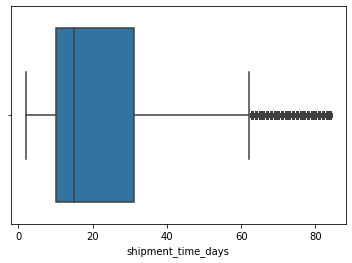

In [30]:
sns.boxplot(x=df['shipment_time_days'])

In [31]:
df

,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,MachineName,shipment_time_days
0,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,0.01,ALCU,FAST,CFS EBE 3,15
1,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,0.01,ALCU,FAST,CFS EBE 3,17
2,2022-06-02 14:21:54,2022-06-04 19:00:00,32978058,20,0.01,ALCU,HPSF,CFS EBE 3,7
3,2022-06-02 18:00:45,2022-06-04 19:00:00,32979249,20,0.01,ALCU,FAST,CFS EBE 3,7
4,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,0.01,SFONXP,FAST,CFS CGN 1,63
...,...,...,...,...,...,...,...,...,...
446932,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898500,55,0.05,PLATE,FAST,HF 7,49
446933,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898525,56,0.05,PLATE,FAST,HF 4,49
446934,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898519,56,0.05,PLATE,FAST,HF 4,49
446935,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898496,54,0.05,PLATE,FAST,HF 7,49


In [32]:
df['shipment_time_days'][df['shipment_time_days']>7].count()

364611

In [33]:
df['shipment_time_days'][df['shipment_time_days']==7].count()

10593

<AxesSubplot:xlabel='shipment_time_days'>

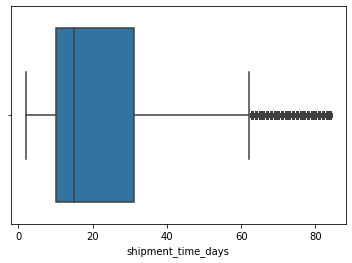

In [34]:
sns.boxplot(x=df['shipment_time_days'])

In [35]:
#drop the rows where shipment_time_hrs value is greater than 7 days (168 hours)
df.drop(df[df['shipment_time_days'] == 7].index,inplace = True)

<AxesSubplot:xlabel='shipment_time_days'>

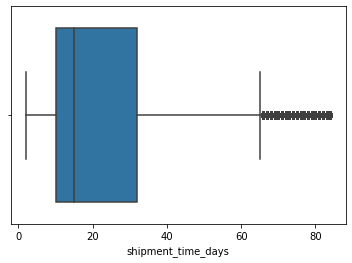

In [36]:
sns.boxplot(x=df['shipment_time_days'])

In [37]:
#instead doing one hot encoding lets try with single column apporach by renaming catagorial to numeric
PITs=df.PITname.unique()
keys = range(len(PITs))
pit_dict=dict(zip(PITs,keys))

purifications=df.PurificationName.unique()
keys = range(len(purifications))
purification_dict=dict(zip(purifications,keys))

mcname=df.MachineName.unique()
keys = range(len(mcname))
mcname_dict=dict(zip(mcname,keys))


In [38]:
print(pit_dict)
print(purification_dict)
print(mcname_dict)

{'ALCU': 0, 'SFONXP': 1, 'CLON': 2, 'PCRP': 3, 'SEQPNXP': 4, 'PCRPNXP': 5, 'QPCR': 6, 'ALCM': 7, 'SEQP': 8, '4Splate': 9, 'SEQPPNXP': 10, 'PLATE': 11, 'NGS_OLIGO': 12, 'OLI_EGO': 13, 'GENESTRAND': 14, 'GENE_PLATE': 15, 'LNAProbe': 16, 'LNAPrimer': 17, 'EXTREMERS': 18, 'RNAC': 19, 'LCProbe': 20}
{'FAST': 0, 'HPSF': 1, 'HPLC': 2, 'BASIC': 3}
{'CFS EBE 3': 0, 'CFS CGN 1': 1, 'HF 10': 2, 'HF 15': 3, 'HF 4': 4, 'HF 9': 5, 'CFS CGN 2': 6, 'HF 6': 7, 'OligoMaker 6': 8, 'HF 5': 9, 'OligoMaker 3': 10, 'HF 8': 11, 'HF 11': 12, 'OligoMaker 1': 13, 'HF 13': 14, 'HF 12': 15, 'CFS EBE 2': 16, 'HF 7': 17, 'OligoMaker 4': 18, 'HF 14': 19, 'Skipped': 20, 'OligoMaker 5': 21, 'OligoMaker 2': 22}


In [39]:
#replace categorial values to desired number
df.PurificationName.replace(purification_dict,inplace=True)
df.PITname.replace(pit_dict,inplace=True)
df.MachineName.replace(mcname_dict,inplace=True)

In [40]:
df.sort_values(['ProdScale'],ascending=False)

,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,MachineName,shipment_time_days
348275,2022-07-25 09:33:49,2022-08-08 19:00:00,33180436,19,10.0,0,1,2,84
53460,2022-07-25 09:33:49,2022-08-08 19:00:00,33180440,19,10.0,0,1,2,84
345395,2022-07-25 09:33:49,2022-08-08 19:00:00,33180437,19,10.0,0,1,2,84
245731,2022-07-25 09:33:49,2022-08-08 19:00:00,33180435,19,10.0,0,1,2,84
254371,2022-07-25 09:33:49,2022-08-08 19:00:00,33180439,19,10.0,0,1,2,84
...,...,...,...,...,...,...,...,...,...
21377,2022-07-22 11:12:12,2022-07-28 23:59:59,33175953,20,0.004,9,0,1,65
21378,2022-07-22 11:12:12,2022-07-28 23:59:59,33175974,20,0.004,9,0,1,65
315251,2022-07-22 11:12:12,2022-07-28 23:59:59,33175978,20,0.004,9,0,1,65
265899,2022-08-29 18:05:00.923000,2022-09-05 23:59:59,33310236,28,0.004,9,0,1,25


In [41]:
len(df['ProdScale'].unique())
for a in df['ProdScale'].unique():
    print(a)

0.01
0.05
0.2
1.0
0.004
10.0


In [42]:
df['ProdScale']=df['ProdScale'].astype(float)

In [43]:
#sns having issues to handle float hence converting to int
df['ProdScale']=df['ProdScale'].apply(lambda x:x*1000)

In [44]:
df['ProdScale']=df['ProdScale'].astype('int')
df.sort_values(['ProdScale'],ascending=False)

,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,MachineName,shipment_time_days
348275,2022-07-25 09:33:49,2022-08-08 19:00:00,33180436,19,10000,0,1,2,84
53460,2022-07-25 09:33:49,2022-08-08 19:00:00,33180440,19,10000,0,1,2,84
345395,2022-07-25 09:33:49,2022-08-08 19:00:00,33180437,19,10000,0,1,2,84
245731,2022-07-25 09:33:49,2022-08-08 19:00:00,33180435,19,10000,0,1,2,84
254371,2022-07-25 09:33:49,2022-08-08 19:00:00,33180439,19,10000,0,1,2,84
...,...,...,...,...,...,...,...,...,...
21377,2022-07-22 11:12:12,2022-07-28 23:59:59,33175953,20,4,9,0,1,65
21378,2022-07-22 11:12:12,2022-07-28 23:59:59,33175974,20,4,9,0,1,65
315251,2022-07-22 11:12:12,2022-07-28 23:59:59,33175978,20,4,9,0,1,65
265899,2022-08-29 18:05:00.923000,2022-09-05 23:59:59,33310236,28,4,9,0,1,25


<AxesSubplot:xlabel='ProdScale'>

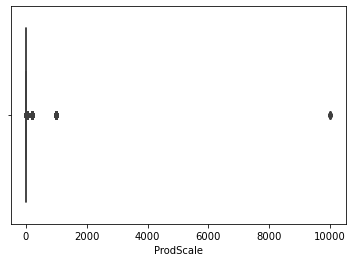

In [45]:
sns.boxplot(x=df['ProdScale'])

In [46]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

10 ==> 302480
50 ==> 75599
200 ==> 6385
1000 ==> 891
4 ==> 553
10000 ==> 7


In [47]:
'''

df.drop(df['ProdScale'][df['ProdScale']==1000].index, inplace = True)
df.drop(df['ProdScale'][df['ProdScale']==10000].index, inplace = True)
df.drop(df['ProdScale'][df['ProdScale']==4].index, inplace = True)
'''
df.drop(df['ProdScale'][df['ProdScale']==4].index, inplace = True)
df.drop(df['ProdScale'][df['ProdScale']==10000].index, inplace = True)

In [48]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

10 ==> 302480
50 ==> 75599
200 ==> 6385
1000 ==> 891


In [49]:
#df.drop(df['ProdScale'][df['ProdScale']==200].index, inplace = True)

In [50]:
#df.drop(df['ProdScale'][df['ProdScale']==50].index, inplace = True)

<AxesSubplot:xlabel='ProdScale'>

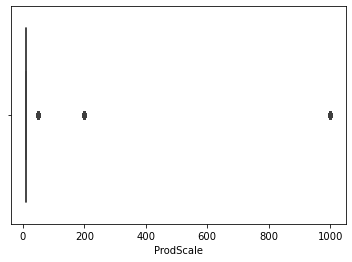

In [51]:
sns.boxplot(x=df['ProdScale'])

In [52]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

10 ==> 302480
50 ==> 75599
200 ==> 6385
1000 ==> 891


In [53]:
import numpy as np
from scipy import stats
df['min_zscore']=np.abs(stats.zscore(df['ProdScale'])) < 3
#len(pd.unique(df['min_zscore']))
df['ProdScale'][df['min_zscore']==False]
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

10         200
15         200
30         200
34        1000
48         200
          ... 
446439     200
446447     200
446618    1000
446654     200
446660     200
Name: ProdScale, Length: 7276, dtype: int32

In [54]:
#df['ProdScale'][df['min_zscore']==False].unique()

In [55]:
df['ProdScale'][df['min_zscore']==False].count()

7276

In [56]:
df.drop(df['ProdScale'][df['min_zscore']==False].index, inplace = True)

<AxesSubplot:xlabel='ProdScale'>

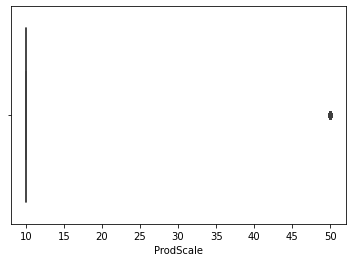

In [57]:
sns.boxplot('ProdScale',data=df)

In [58]:
df['min_zscore']=np.abs(stats.zscore(df['ProdScale'])) < 3
#len(pd.unique(df['min_zscore']))
df['ProdScale'][df['min_zscore']==False]
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

Series([], Name: ProdScale, dtype: int32)

In [59]:
df['ProdScale'][df['min_zscore']==False].unique()

array([], dtype=int32)

In [60]:
df['ProdScale'][df['min_zscore']==False].count()

0

In [61]:
df.drop(df['ProdScale'][df['min_zscore']==False].index, inplace = True)

<AxesSubplot:xlabel='ProdScale'>

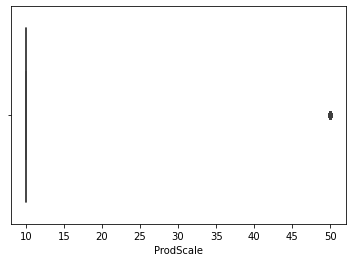

In [62]:
sns.boxplot(x=df.ProdScale)

In [63]:
df

,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,MachineName,shipment_time_days,min_zscore
0,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,10,0,0,0,15,True
1,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,10,0,0,0,17,True
4,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,10,1,0,1,63,True
5,2022-06-03 16:02:36.043000,2022-06-05 23:59:59,32983756,25,10,1,0,1,2,True
6,2022-06-02 11:10:54,2022-06-07 19:00:00,32976003,20,10,0,0,0,10,True
...,...,...,...,...,...,...,...,...,...,...
446932,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898500,55,50,11,0,17,49,True
446933,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898525,56,50,11,0,4,49,True
446934,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898519,56,50,11,0,4,49,True
446935,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898496,54,50,11,0,17,49,True


In [64]:
df.drop(['min_zscore'],axis=1,inplace=True)

<AxesSubplot:xlabel='sequencelength'>

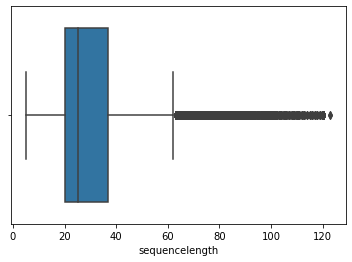

In [65]:
sns.boxplot(x=df['sequencelength'])

In [66]:
df['min_zscore']=np.abs(stats.zscore(df['sequencelength'])) < 3
#len(pd.unique(df['min_zscore']))
df['sequencelength'][df['min_zscore']==False]
#print(df['sequencelength'][df['min_zscore']==False],'-->',df['sequencelength'][df['min_zscore']==False].count())
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

234        68
705        65
850        96
1269       89
1411       71
         ... 
446718     89
446719     77
446727    105
446729     68
446732     98
Name: sequencelength, Length: 3974, dtype: int64

In [67]:
#df['sequencelength'][df['min_zscore']==False].count()

In [68]:
df.drop(df['sequencelength'][df['min_zscore']==False].index, inplace = True)

In [69]:
df['sequencelength'][df['min_zscore']==False].count()

0

<AxesSubplot:xlabel='sequencelength'>

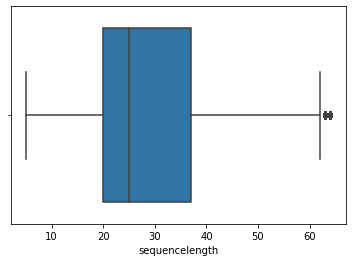

In [70]:
sns.boxplot(x=df['sequencelength'])

In [71]:
df.dtypes

OrderFirstConfirmedDateTime    object
OrderDueDate                   object
ido                             int64
sequencelength                  int64
ProdScale                       int32
PITname                         int64
PurificationName                int64
MachineName                     int64
shipment_time_days              int32
min_zscore                       bool
dtype: object

In [72]:
df.drop(['min_zscore'],inplace=True,axis=1)

In [73]:
df

,OrderFirstConfirmedDateTime,OrderDueDate,ido,sequencelength,ProdScale,PITname,PurificationName,MachineName,shipment_time_days
0,2022-06-01 14:09:29,2022-06-02 19:00:00,32969575,17,10,0,0,0,15
1,2022-06-01 14:42:59,2022-06-04 19:00:00,32970130,21,10,0,0,0,17
4,2022-06-03 12:23:10,2022-06-05 23:59:59,32981704,30,10,1,0,1,63
5,2022-06-03 16:02:36.043000,2022-06-05 23:59:59,32983756,25,10,1,0,1,2
6,2022-06-02 11:10:54,2022-06-07 19:00:00,32976003,20,10,0,0,0,10
...,...,...,...,...,...,...,...,...,...
446932,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898500,55,50,11,0,17,49
446933,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898525,56,50,11,0,4,49
446934,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898519,56,50,11,0,4,49
446935,2022-05-16 08:51:15.240000,2022-05-23 19:00:00,32898496,54,50,11,0,17,49


In [74]:
# plotting the heatmap
hm = sns.heatmap(data = df)  
# displaying the plotted heatmap
plt.show()

ValueError: could not convert string to float: '2022-06-01 14:09:29'

In [ ]:
df.drop_duplicates(keep='first')

In [ ]:
for a in df.columns:
    sns.displot(df[a])

In [ ]:
df

In [ ]:
df.drop_duplicates(keep='first')

In [ ]:
for a in df.columns:
    sns.displot(df[a])

In [ ]:
# piarplor to create pairwise relationships in a dataset.
sns.pairplot(df,vars = ['PITname','PurificationName','sequencelength'], hue="shipment_time_days")


In [ ]:
# piarplor to create pairwise relationships in a dataset.
sns.pairplot(df,vars = ['sequencelength','ProdScale'], hue="shipment_time_days")

In [ ]:
sns.pairplot(df,vars = ['ProdScale'], hue="shipment_time_days")

In [ ]:
#binning
for a in df.columns:
    plt.hist(df[a], bins=5)
    plt.title(a)
    plt.show()

In [ ]:
df.reset_index()

In [ ]:
df.to_csv('preprocessed.csv',index=False)

<center><h1> Model Creation </h1></center>

In [ ]:
# Drop the colum class_account from DF for train set 
x = df.drop(['shipment_time_days'],axis=1)
y = df['shipment_time_days'] 

In [ ]:
#spiltting data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### RandomForestClassifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200,max_depth= 30,)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
y_pred

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
importance=clf.feature_importances_
indices = np.argsort(importance)
features=df.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Gaussian Naive Bayes

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnbm=gnb.fit(x_train, y_train)

In [ ]:
y_pred = gnb.predict(x_test)

y_pred

In [ ]:
predict = pd.DataFrame(y_pred)

plt.figure(figsize=(10,10))        
sns.distplot(predict,color='red')
sns.distplot(pd.DataFrame(y_test).shipment_time_days)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

In [ ]:
y_pred_en = clf_en.predict(x_test)

In [ ]:
clf_en.predict(pd.DataFrame([[10,50,6,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[10,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[10,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[56,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[56,50,5,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf.predict(pd.DataFrame([[56,50,5,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[40,10,0,0]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[40,10,0,0]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
#drop the rows where shipment_time_hrs value is greater than 7 days (168 hours)
df.drop(df[df['shipment_time_days'] > 7].index,inplace = True)

In [ ]:
sns.boxplot(x=df['shipment_time_days'])

In [ ]:
df['shipment_time_days'][df['shipment_time_days']==7].count()

In [ ]:
df['shipment_time_days'][df['shipment_time_days']==7].count()

In [ ]:
#instead doing one hot encoding lets try with single column apporach by renaming catagorial to numeric
PITs=df.PITname.unique()
keys = range(len(PITs))
pit_dict=dict(zip(PITs,keys))

purifications=df.PurificationName.unique()
keys = range(len(purifications))
purification_dict=dict(zip(purifications,keys))

mcname=df.MachineName.unique()
keys = range(len(mcname))
mcname_dict=dict(zip(mcname,keys))


In [ ]:
print(pit_dict)
print(purification_dict)
print(mcname_dict)

In [ ]:
#replace categorial values to desired number
df.PurificationName.replace(purification_dict,inplace=True)
df.PITname.replace(pit_dict,inplace=True)
df.MachineName.replace(mcname_dict,inplace=True)

In [ ]:
df.sort_values(['ProdScale'],ascending=False)

In [ ]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

In [ ]:
len(df['ProdScale'].unique())
for a in df['ProdScale'].unique():
    print(a)

In [ ]:
df['ProdScale']=df['ProdScale'].astype(float)

In [ ]:
#sns having issues to handle float hence converting to int
df['ProdScale']=df['ProdScale'].apply(lambda x:x*1000)

In [ ]:
df['ProdScale']=df['ProdScale'].astype('int')
df.sort_values(['ProdScale'],ascending=False)

In [ ]:
sns.boxplot(x=df['ProdScale'])

In [ ]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

In [ ]:
df.drop(df['ProdScale'][df['ProdScale']==1000].index, inplace = True)
df.drop(df['ProdScale'][df['ProdScale']==10000].index, inplace = True)
df.drop(df['ProdScale'][df['ProdScale']==4].index, inplace = True)

In [ ]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

In [ ]:
df.drop(df['ProdScale'][df['ProdScale']==200].index, inplace = True)

In [ ]:
df.drop(df['ProdScale'][df['ProdScale']==50].index, inplace = True)

In [ ]:
sns.boxplot(x=df['ProdScale'])

In [ ]:
for a in df['ProdScale'].unique():
    print(a,'==>',df['ProdScale'][df['ProdScale']==a].count())

In [ ]:
import numpy as np
from scipy import stats
df['min_zscore']=np.abs(stats.zscore(df['ProdScale'])) < 3
#len(pd.unique(df['min_zscore']))
df['ProdScale'][df['min_zscore']==False]
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

In [ ]:
df['ProdScale'][df['min_zscore']==False].unique()

In [ ]:
df['ProdScale'][df['min_zscore']==False].count()

In [ ]:
df.drop(df['ProdScale'][df['min_zscore']==False].index, inplace = True)

In [ ]:
sns.boxplot('ProdScale',data=df)

In [ ]:
df['min_zscore']=np.abs(stats.zscore(df['ProdScale'])) < 3
#len(pd.unique(df['min_zscore']))
df['ProdScale'][df['min_zscore']==False]
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

In [ ]:
df['ProdScale'][df['min_zscore']==False].unique()

In [ ]:
df['ProdScale'][df['min_zscore']==False].count()

In [ ]:
df.drop(df['ProdScale'][df['min_zscore']==False].index, inplace = True)

In [ ]:
sns.boxplot(x=df.ProdScale)

In [ ]:
df

In [ ]:
df.drop(['min_zscore'],axis=1,inplace=True)

In [ ]:
sns.boxplot(x=df['sequencelength'])

In [ ]:
df['min_zscore']=np.abs(stats.zscore(df['sequencelength'])) < 3
#len(pd.unique(df['min_zscore']))
df['sequencelength'][df['min_zscore']==False]
#print(df['sequencelength'][df['min_zscore']==False],'-->',df['sequencelength'][df['min_zscore']==False].count())
#df.drop(df['tot_mins_diff'][df['min_zscore']==False].index, inplace = True)

In [ ]:
df['sequencelength'][df['min_zscore']==False].count()

In [ ]:
df.drop(df['sequencelength'][df['min_zscore']==False].index, inplace = True)

In [ ]:
df['sequencelength'][df['min_zscore']==False].count()

In [ ]:
sns.boxplot(x=df['sequencelength'])

In [ ]:
df.dtypes

In [ ]:
df.drop(['min_zscore'],inplace=True,axis=1)

In [ ]:
# plotting the heatmap
hm = sns.heatmap(data = df)  
# displaying the plotted heatmap
plt.show()

In [ ]:
# piarplor to create pairwise relationships in a dataset.
sns.pairplot(df,vars = ['PITname','PurificationName','sequencelength'], hue="shipment_time_days")


In [ ]:
# piarplor to create pairwise relationships in a dataset.
sns.pairplot(df,vars = ['sequencelength','ProdScale'], hue="shipment_time_days")

In [ ]:
sns.pairplot(df,vars = ['ProdScale'], hue="shipment_time_days")

In [ ]:
#binning
for a in df.columns:
    plt.hist(df[a], bins=5)
    plt.title(a)
    plt.show()

In [ ]:
df.reset_index()

In [ ]:
df.to_csv('preprocessed.csv',index=False)

<center><h1> Model Creation </h1></center>

In [ ]:
# Drop the colum class_account from DF for train set 
x = df.drop(['shipment_time_days'],axis=1)
y = df['shipment_time_days'] 

In [ ]:
#spiltting data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### RandomForestClassifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200,max_depth= 30,)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
y_pred

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
importance=clf.feature_importances_
indices = np.argsort(importance)
features=df.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Gaussian Naive Bayes

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnbm=gnb.fit(x_train, y_train)

In [ ]:
y_pred = gnb.predict(x_test)

y_pred

In [ ]:
predict = pd.DataFrame(y_pred)

plt.figure(figsize=(10,10))        
sns.distplot(predict,color='red')
sns.distplot(pd.DataFrame(y_test).shipment_time_days)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

In [ ]:
y_pred_en = clf_en.predict(x_test)

In [ ]:
clf_en.predict(pd.DataFrame([[10,50,6,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[10,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[10,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[56,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[56,50,5,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf.predict(pd.DataFrame([[56,50,5,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf.predict(pd.DataFrame([[15,50,1,1]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
clf_en.predict(pd.DataFrame([[40,10,0,0]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]

In [ ]:
gnb.predict(pd.DataFrame([[40,10,0,0]],columns=['sequencelength','ProdScale','PITname','PurificationName']))[0]